In [34]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout
from keras.layers import Dense
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import seaborn as sns

In [5]:
df = pd.read_csv('./kaggle/city_hour.csv')
df

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [7]:
print(df.shape)

(707875, 16)


In [8]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


In [9]:
df.dropna()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
50888,Amaravati,2017-11-25 09:00:00,104.00,148.50,1.93,23.00,13.75,9.80,0.10,15.30,117.62,0.30,10.40,0.23,155.0,Moderate
50889,Amaravati,2017-11-25 10:00:00,94.50,142.00,1.33,16.25,9.75,9.65,0.10,17.00,136.23,0.28,7.10,0.15,159.0,Moderate
50890,Amaravati,2017-11-25 11:00:00,82.75,126.50,1.47,14.83,9.07,9.70,0.10,15.40,149.92,0.20,4.55,0.08,173.0,Moderate
50893,Amaravati,2017-11-25 14:00:00,68.50,117.00,1.35,13.60,8.35,7.40,0.10,21.80,161.70,0.10,2.30,0.00,191.0,Moderate
50894,Amaravati,2017-11-25 15:00:00,69.25,112.25,1.52,11.80,7.55,9.25,0.10,21.38,161.68,0.10,2.35,0.00,191.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707863,Visakhapatnam,2020-06-30 13:00:00,12.75,45.00,0.55,17.20,9.32,9.12,0.11,10.82,45.80,0.00,0.00,0.00,50.0,Good
707864,Visakhapatnam,2020-06-30 14:00:00,10.75,36.75,1.10,17.75,10.28,4.65,0.34,4.38,50.73,0.00,0.00,0.00,51.0,Satisfactory
707865,Visakhapatnam,2020-06-30 15:00:00,15.75,30.25,0.95,13.75,8.07,4.67,0.30,2.90,41.55,0.00,0.00,0.00,51.0,Satisfactory
707866,Visakhapatnam,2020-06-30 16:00:00,14.00,29.50,1.77,20.70,12.45,8.08,0.45,7.12,39.23,0.00,0.00,0.00,51.0,Satisfactory


In [10]:
dfd = df.loc[ df['City'] == 'Delhi']  #will be using the delhi data first for simplicity
dfd

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
245172,Delhi,2015-01-01 01:00:00,454.58,935.18,81.52,41.78,187.66,27.54,9.29,3.41,54.94,25.24,58.57,13.80,NaN,NaN
245173,Delhi,2015-01-01 02:00:00,440.44,NaN,70.80,43.46,176.83,27.72,13.28,3.88,50.53,23.10,49.37,15.63,NaN,NaN
245174,Delhi,2015-01-01 03:00:00,409.09,NaN,132.46,41.19,141.02,28.94,29.67,2.83,19.33,19.04,38.94,17.18,NaN,NaN
245175,Delhi,2015-01-01 04:00:00,436.12,NaN,84.78,39.55,102.84,29.30,21.76,4.33,20.08,13.99,27.53,16.82,NaN,NaN
245176,Delhi,2015-01-01 05:00:00,415.88,976.99,60.24,37.41,80.12,30.84,26.19,6.17,16.00,11.14,21.99,14.29,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293359,Delhi,2020-06-30 20:00:00,43.19,123.26,6.33,22.28,17.66,29.92,0.92,10.64,44.13,1.63,17.83,0.86,97.0,Satisfactory
293360,Delhi,2020-06-30 21:00:00,45.30,125.22,6.34,22.91,17.96,29.95,1.04,10.59,39.62,1.72,18.06,1.16,99.0,Satisfactory
293361,Delhi,2020-06-30 22:00:00,49.04,129.39,6.29,20.95,16.80,30.01,1.00,10.20,38.95,1.66,16.17,1.18,101.0,Moderate
293362,Delhi,2020-06-30 23:00:00,50.51,128.86,6.19,20.40,16.83,29.40,0.94,10.98,34.53,1.60,16.79,0.85,102.0,Moderate


In [11]:
dfd.info

<bound method DataFrame.info of          City             Datetime   PM2.5    PM10      NO    NO2     NOx  \
245172  Delhi  2015-01-01 01:00:00  454.58  935.18   81.52  41.78  187.66   
245173  Delhi  2015-01-01 02:00:00  440.44     NaN   70.80  43.46  176.83   
245174  Delhi  2015-01-01 03:00:00  409.09     NaN  132.46  41.19  141.02   
245175  Delhi  2015-01-01 04:00:00  436.12     NaN   84.78  39.55  102.84   
245176  Delhi  2015-01-01 05:00:00  415.88  976.99   60.24  37.41   80.12   
...       ...                  ...     ...     ...     ...    ...     ...   
293359  Delhi  2020-06-30 20:00:00   43.19  123.26    6.33  22.28   17.66   
293360  Delhi  2020-06-30 21:00:00   45.30  125.22    6.34  22.91   17.96   
293361  Delhi  2020-06-30 22:00:00   49.04  129.39    6.29  20.95   16.80   
293362  Delhi  2020-06-30 23:00:00   50.51  128.86    6.19  20.40   16.83   
293363  Delhi  2020-07-01 00:00:00   54.01  128.66    6.33  21.05   16.81   

          NH3     CO    SO2     O3  Benzene

In [12]:
dfd.isnull().sum()

City              0
Datetime          0
PM2.5           375
PM10           2421
NO              298
NO2             330
NOx              25
NH3             980
CO              364
SO2            2852
O3             2201
Benzene          38
Toluene          26
Xylene        18904
AQI             498
AQI_Bucket      498
dtype: int64

In [13]:
dfd = dfd.dropna()

In [14]:
x_train = dfd.loc[dfd['Datetime'] < '2019-01-01 00:00:00'] # we only use the data upto 2019  as the training data
y_train = x_train['PM2.5'] # we the pm2.5 column to further simplfy and break the anallysis into smaller steps
x_test = dfd.loc[dfd['Datetime'] > '2019-01-01 00:00:00']
y_test = x_test['PM2.5']
x_test.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
280236,Delhi,2019-01-01 01:00:00,404.86,630.67,155.77,75.57,188.80,62.60,3.96,16.95,36.30,11.64,73.41,3.85,496.0,Severe
280237,Delhi,2019-01-01 02:00:00,408.67,613.37,143.89,71.75,169.26,63.13,3.42,15.57,35.90,11.14,67.02,5.82,495.0,Severe
280238,Delhi,2019-01-01 03:00:00,398.94,588.66,121.35,67.72,145.91,55.74,3.21,13.77,35.72,10.23,59.34,6.01,494.0,Severe
280239,Delhi,2019-01-01 04:00:00,367.65,533.44,120.03,62.67,143.87,55.83,2.73,13.16,33.85,9.81,54.04,4.80,493.0,Severe
280240,Delhi,2019-01-01 05:00:00,340.12,502.34,122.68,56.89,141.80,55.94,2.24,12.48,30.31,9.12,46.86,3.80,493.0,Severe


In [15]:
train_norm = x_train['PM2.5']
train_norm_arr = np.asarray(train_norm)
train_norm = np.reshape(train_norm_arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
train_norm = scaler.fit_transform(train_norm)
for i in range(5):
    print(train_norm[i])

[0.25537539]
[0.22946424]
[0.26418187]
[0.36375998]
[0.41412088]


In [16]:
test_norm = x_test['PM2.5']
test_norm_arr = np.asarray(test_norm)
test_norm = np.reshape(test_norm_arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
test_norm = scaler.fit_transform(test_norm)
for i in range(5):
    print(test_norm[i])

[0.47282699]
[0.47735979]
[0.4657839]
[0.42855783]
[0.39580508]


In [17]:
print(len(train_norm))
print(len(test_norm))
print(train_norm.shape)
print(test_norm.shape)

15930
13128
(15930, 1)
(13128, 1)


In [18]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)

In [19]:
n_steps = 5 
X_split_train, y_split_train = split_sequence(train_norm, n_steps)

X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1],1))
print(X_split_train[0])
print(X_split_train[1])

[[0.25537539]
 [0.22946424]
 [0.26418187]
 [0.36375998]
 [0.41412088]]
[[0.22946424]
 [0.26418187]
 [0.36375998]
 [0.41412088]
 [0.40167997]]


In [20]:
X_split_test, y_split_test = split_sequence(test_norm, n_steps)
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], 1))

In [21]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1),return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

Epoch 1/10


498/498 [==============================] - 6s 6ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 9.8490e-04 - val_mean_squared_error: 9.8490e-04
Epoch 2/10
498/498 [==============================] - 3s 5ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 7.0613e-04 - val_mean_squared_error: 7.0613e-04
Epoch 3/10
498/498 [==============================] - 3s 5ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 6.5487e-04 - val_mean_squared_error: 6.5487e-04
Epoch 4/10
498/498 [==============================] - 3s 6ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 3.9280e-04 - val_mean_squared_error: 3.9280e-04
Epoch 5/10
498/498 [==============================] - 2s 5ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 2.6981e-04 - val_mean_squared_error: 2.6981e-04
Epoch 6/10
498/498 [==============================] - 3s 5ms/step - loss: 9.7548e-04 - mean_squared_error: 9.7548e-04 - val_loss: 3.2413e-04 - val_m

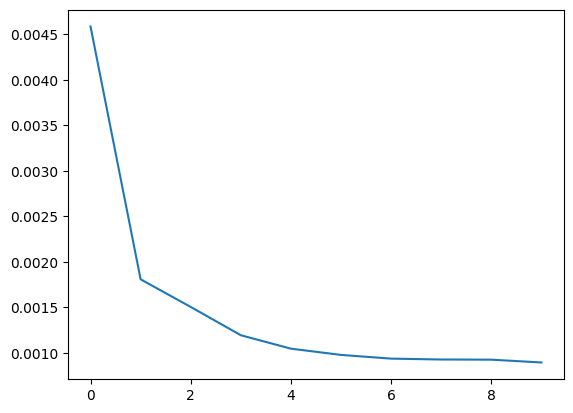

In [23]:
plt.plot(hist.history['loss'],label='training loss')


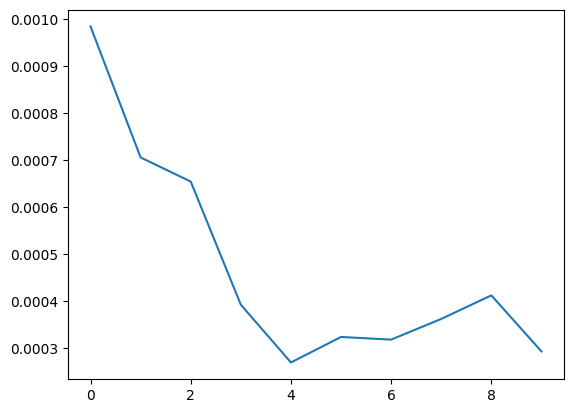

In [24]:
plt.plot(hist.history['val_loss'],label = "Validation loss")

In [25]:
pred = model.predict(X_split_test)
mse = mean_squared_error(y_split_test, pred)
print('MSE: %.5f' % mse)

411/411 [==============================] - 1s 2ms/step
MSE: 0.00029


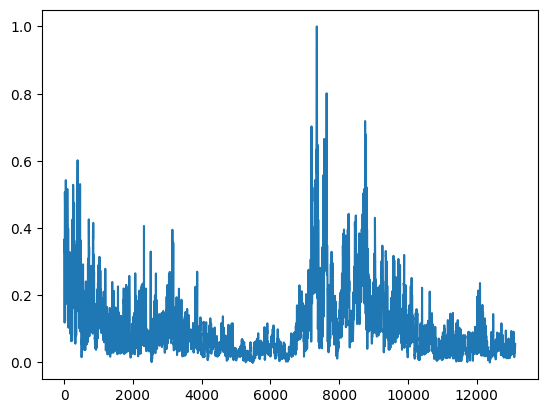

In [26]:
plt.plot(y_split_test)


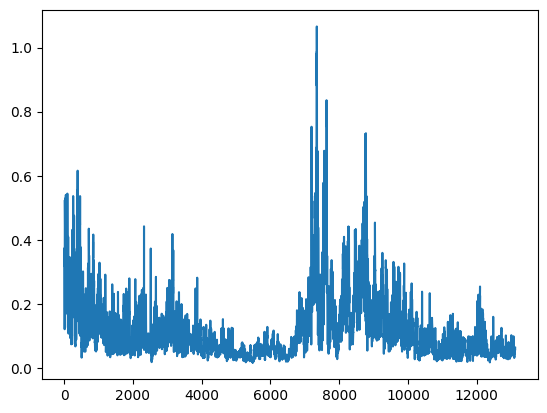

In [27]:
plt.plot(pred)

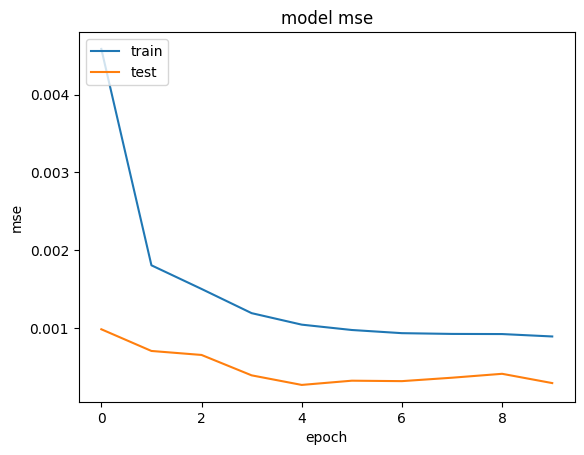

In [28]:
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

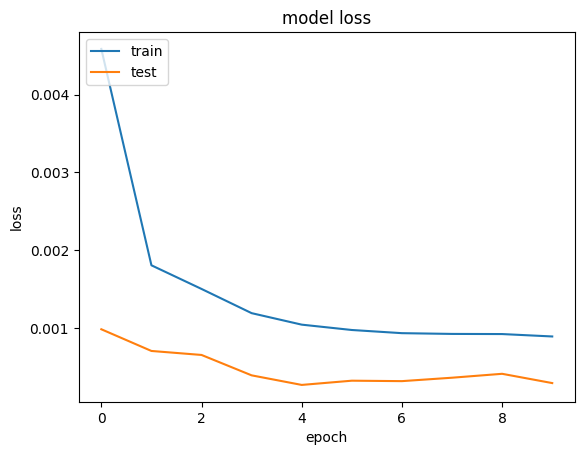

In [29]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
def compute(var):
    train_norm1 = x_train[var] 
    train_norm_arr = np.asarray(train_norm1)
    train_norm1 = np.reshape(train_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_norm1 = scaler.fit_transform(train_norm1)
    train_norm1 = train_norm1[train_norm1 != 0]
    
    test_norm1 = x_test[var]
    test_norm_arr = np.asarray(test_norm1)
    test_norm1 = np.reshape(test_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    test_norm1 = scaler.fit_transform(test_norm1)
    test_norm1 = test_norm1[test_norm1 != 0]
    n_features = 1
    X_split_train, y_split_train = split_sequence(train_norm1, n_steps)
    X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

    X_split_test, y_split_test = split_sequence(test_norm1, n_steps)
    X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

    hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

    yhat = model.predict(X_split_test)

    mse = mean_squared_error(y_split_test, yhat)
    print(mse)
    
    plt.plot(hist.history['mean_squared_error'])
    plt.plot(hist.history['val_mean_squared_error'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/10
498/498 [==============================] - 5s 6ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2/10
498/498 [==============================] - 2s 5ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 3/10
498/498 [==============================] - 2s 5ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 8.7389e-04 - val_mean_squared_error: 8.7198e-04
Epoch 4/10
498/498 [==============================] - 3s 5ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 5/10
498/498 [==============================] - 2s 5ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 6/10
498/498 [==============================] - 2s 5ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 7/10
498/498 [

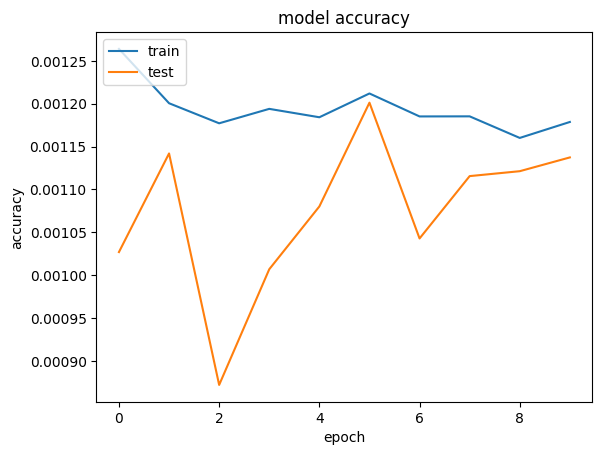

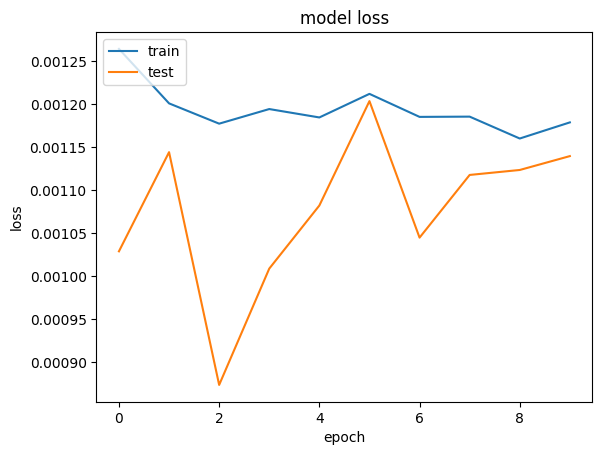

In [31]:
compute('SO2')

Epoch 1/10
498/498 [==============================] - 3s 6ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 5.6770e-05 - val_mean_squared_error: 5.6638e-05
Epoch 2/10
498/498 [==============================] - 3s 6ms/step - loss: 7.7029e-04 - mean_squared_error: 7.7058e-04 - val_loss: 6.6078e-05 - val_mean_squared_error: 6.5968e-05
Epoch 3/10
498/498 [==============================] - 3s 6ms/step - loss: 7.0048e-04 - mean_squared_error: 7.0026e-04 - val_loss: 6.7958e-05 - val_mean_squared_error: 6.7993e-05
Epoch 4/10
498/498 [==============================] - 3s 6ms/step - loss: 6.8689e-04 - mean_squared_error: 6.8711e-04 - val_loss: 7.4791e-05 - val_mean_squared_error: 7.4910e-05
Epoch 5/10
498/498 [==============================] - 3s 6ms/step - loss: 6.5845e-04 - mean_squared_error: 6.5824e-04 - val_loss: 7.3831e-05 - val_mean_squared_error: 7.3910e-05
Epoch 6/10
498/498 [==============================] - 3s 6ms/step - loss: 6.6469e-04 - mean_squared_error: 6.6495e-04 

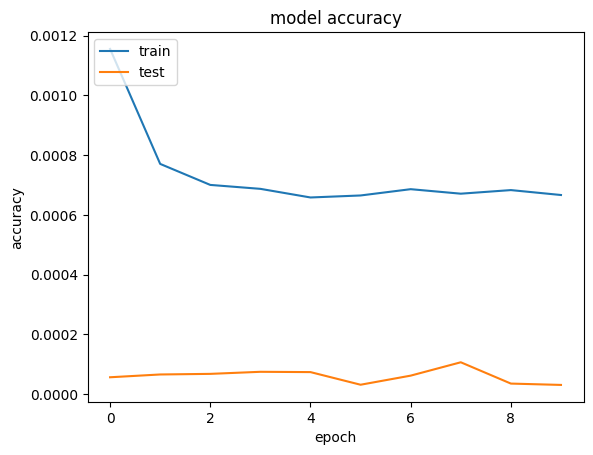

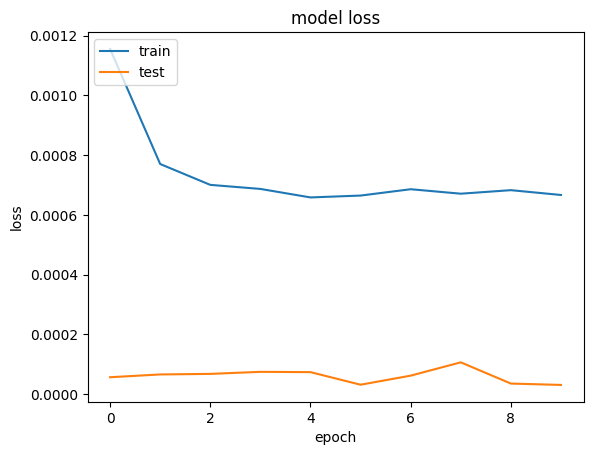

In [32]:
compute('AQI')

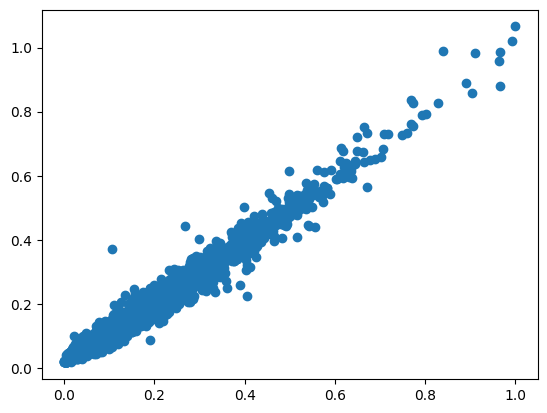

In [33]:
plt.scatter(y_split_test, pred)

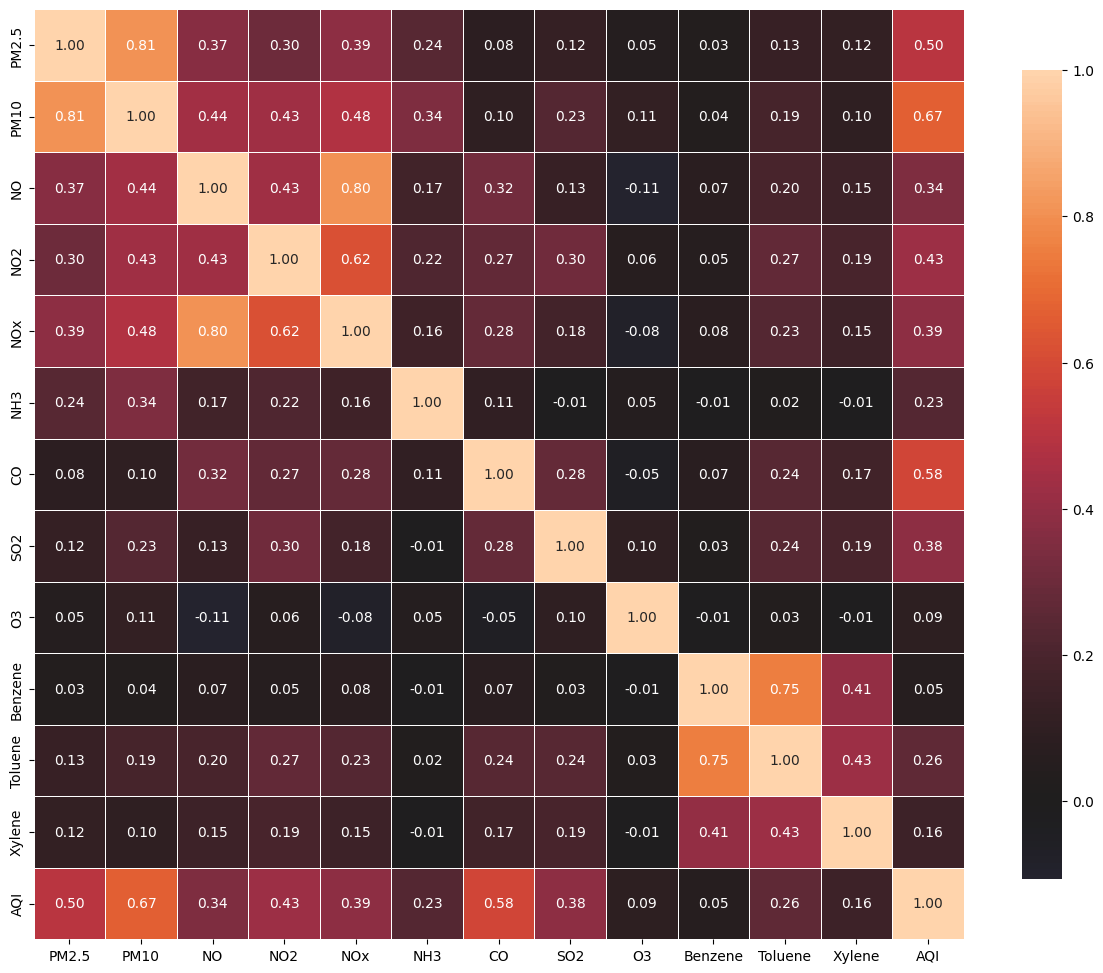

In [41]:
dfc = df.drop(['City','Datetime','AQI_Bucket'], axis=1)
correlations = dfc.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();